In [4]:
import pandas as pd
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer

# Read in Test Data and Model

In [5]:
water = pd.read_csv('Data/holdout_set.csv', index_col=0)
print(water.shape)
water.head()

(819, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1798,6.467868,236.694648,7656.413248,9.840949,214.460834,356.347842,14.412734,54.641176,2.861064,0
2660,8.331553,238.992414,11635.772076,3.923239,276.402280,406.245129,15.410764,NaN,2.692389,0
1700,7.700362,220.571796,29432.208251,6.356294,322.750328,444.957618,13.027439,77.829802,3.786487,0
392,6.664003,199.588718,15902.945276,5.257789,346.584556,347.353336,15.989419,61.156575,2.227728,1
551,NaN,190.046661,18327.438429,7.898765,354.419249,445.928456,12.902213,63.456620,4.543581,0


In [6]:
infile = open("pickle/model.pickle",'rb')
model = pickle.load(infile)
infile.close()

In [ ]:
model

In [7]:
infile = open("pickle/other.pickle",'rb')
other = pickle.load(infile)
infile.close()

# Is missing columns

In [8]:
x = water['ph']
condlist = [x == 'NaN', x != 'NaN']
choicelist = [1, 0]
water['ph_missing'] = np.select(condlist, choicelist)

y = water['Sulfate']
condlist = [y == 'NaN', y != 'NaN']
choicelist = [1, 0]
water['Sulfate_missing'] = np.select(condlist, choicelist)

z = water['Trihalomethanes']
condlist = [z == 'NaN', z != 'NaN']
choicelist = [1, 0]
water['Trihalomethanes_missing'] = np.select(condlist, choicelist)

# Impute Missing Values

In [9]:

imp=SimpleImputer(missing_values=np.NaN, strategy = 'mean')
water_imputed =pd.DataFrame(imp.fit_transform(water))
water_imputed.columns=water.columns
water_imputed.index=water.index

In [11]:
X=water_imputed.drop("Potability", axis=1)
y=water_imputed.Potability

In [22]:
y

1798    0.0
2660    0.0
1700    0.0
392     1.0
551     0.0
       ... 
1156    1.0
3235    1.0
3175    1.0
1913    1.0
2489    0.0
Name: Potability, Length: 819, dtype: float64

# Polynomial Features (2)

In [12]:

poly=PolynomialFeatures(degree=2)
poly_water = poly.fit_transform(X)

water_columns = poly.get_feature_names(X.columns)
poly_water = pd.DataFrame(poly_water, columns=water_columns)

In [23]:
poly_water.shape

(819, 91)

# Predict using Random Forest

In [14]:
final_columns = other[0]
final_columns

,1,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,...,Turbidity^2,Turbidity ph_missing,Turbidity Sulfate_missing,Turbidity Trihalomethanes_missing,ph_missing^2,ph_missing Sulfate_missing,ph_missing Trihalomethanes_missing,Sulfate_missing^2,Sulfate_missing Trihalomethanes_missing,Trihalomethanes_missing^2
0,1.0,8.884935,145.277706,17621.390115,8.267974,341.477474,286.890777,15.194724,42.289054,4.714163,...,22.223337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.081348,187.043283,24634.552443,9.081880,334.238580,443.843399,11.053925,74.108180,3.498717,...,12.241019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,7.261551,179.889788,24964.777703,5.837086,349.269271,501.182781,17.287713,50.993006,3.636364,...,13.223144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,...,19.287304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,9.723377,190.897421,9076.646483,9.752088,357.384709,443.037417,13.307824,62.826687,4.072063,...,16.581700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,1.0,7.348845,223.264940,11519.046527,8.889559,334.238580,494.158434,18.145374,73.715522,4.880875,...,23.822942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2453,1.0,3.928556,191.665998,17328.161457,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836,...,25.612061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2454,1.0,7.774468,216.752872,22316.398284,7.947534,385.043438,288.068578,14.136699,68.861861,3.891097,...,15.140638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2455,1.0,7.833980,203.169408,11174.274760,6.246502,394.890809,338.231122,16.276592,47.931639,4.254477,...,18.100576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
final_answers = model.predict(poly_water)

In [25]:
water_final = pd.DataFrame(final_answers)
water_final

,0
0,0
1,0
2,0
3,0
4,0
...,...
814,0
815,0
816,0
817,0


              precision    recall  f1-score   support

         0.0       0.66      0.92      0.77       500
         1.0       0.69      0.27      0.39       319

    accuracy                           0.67       819
   macro avg       0.67      0.60      0.58       819
weighted avg       0.67      0.67      0.62       819



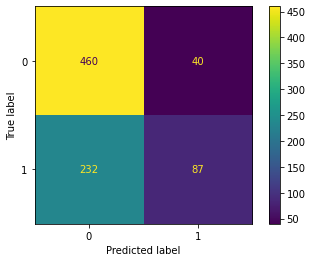

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(model, poly_water, y)

print(classification_report(y, final_answers))

In [27]:
water_final.to_csv('Data/water_predictions.csv')